20BCE0149


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/drug.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
# checking for null values
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

<Axes: >

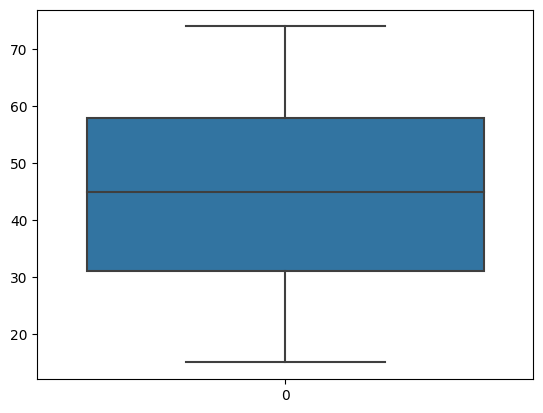

In [5]:
# checking for outlier
sns.boxplot(df.Age)

<Axes: >

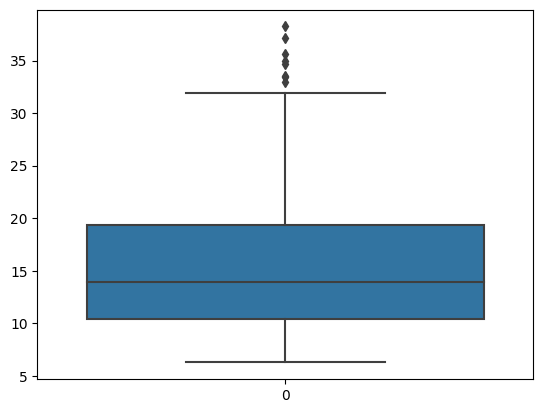

In [6]:
sns.boxplot(df.Na_to_K)

In [7]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [8]:
# adjusting outlier with mean
q1=df.Na_to_K.quantile(.25)
q3=df.Na_to_K.quantile(.75)
IQR=q3-q1
ul=q3+1.5*IQR
df['Na_to_K']=np.where(df['Na_to_K']>ul,16,df['Na_to_K'])


<Axes: >

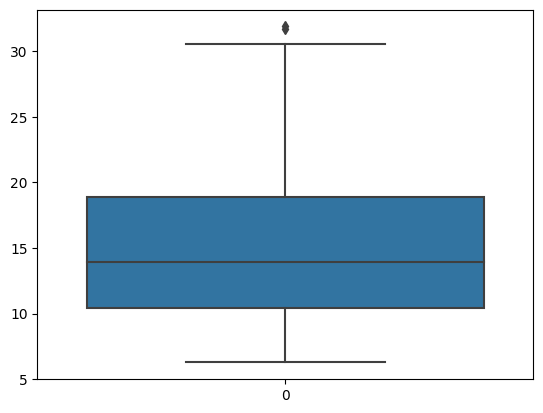

In [9]:
sns.boxplot(df.Na_to_K)

In [10]:
#spliting data
df.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [11]:

x=df.iloc[:,0:5]
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [12]:
y=df.iloc[:,5:]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=12)

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
#encoding independent features using labelencoder while y encoded using one hot
le = LabelEncoder()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [18]:
xtrain['Sex'] = le.fit_transform(xtrain['Sex'])
xtest['Sex'] = le.transform(xtest['Sex'])
#print(xtest['Sex'].iloc[0:4])
xtrain['BP'] = le.fit_transform(xtrain['BP'])
xtest['BP'] = le.transform(xtest['BP'])
xtrain['Cholesterol'] = le.fit_transform(xtrain['Cholesterol'])
xtest['Cholesterol'] = le.transform(xtest['Cholesterol'])

In [19]:
ytrain['Drug'] = le.fit_transform(ytrain['Drug'])
ytest['Drug'] = le.transform(ytest['Drug'])

In [20]:
ytrain

,Drug
77,0
47,3
94,0
14,4
41,2
...,...
3,4
130,0
134,0
155,3


In [21]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [22]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [23]:
#ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [24]:

model = Sequential()
model.add(Dense(5,activation='relu'))
#hidden start
model.add(Dense(90,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(70,activation='relu'))
model.add(Dense(60,activation='relu'))
model.add(Dense(50,activation='relu'))
#hidden end
model.add(Dense(5,activation='softmax')) 

In [25]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [33]:
model.fit(xtrain,ytrain,epochs=12,batch_size=20,validation_data=(xtest,ytest))

Epoch 1/12
8/8 [==============================] - 0s 15ms/step - loss: 0.8047 - accuracy: 0.6938 - val_loss: 0.9324 - val_accuracy: 0.6000
Epoch 2/12
8/8 [==============================] - 0s 8ms/step - loss: 0.7435 - accuracy: 0.7000 - val_loss: 0.7643 - val_accuracy: 0.7500
Epoch 3/12
8/8 [==============================] - 0s 9ms/step - loss: 0.7180 - accuracy: 0.7125 - val_loss: 0.7511 - val_accuracy: 0.7250
Epoch 4/12
8/8 [==============================] - 0s 9ms/step - loss: 0.6911 - accuracy: 0.7437 - val_loss: 0.7509 - val_accuracy: 0.7500
Epoch 5/12
8/8 [==============================] - 0s 7ms/step - loss: 0.7574 - accuracy: 0.6750 - val_loss: 0.7692 - val_accuracy: 0.7000
Epoch 6/12
8/8 [==============================] - 0s 6ms/step - loss: 0.7291 - accuracy: 0.6812 - val_loss: 0.8706 - val_accuracy: 0.6750
Epoch 7/12
8/8 [==============================] - 0s 6ms/step - loss: 0.7540 - accuracy: 0.6750 - val_loss: 0.9334 - val_accuracy: 0.6750
Epoch 8/12
8/8 [=================

In [34]:
#Testing

ypred = model.predict([[50,1,2,1,11]])
ypred

1/1 [==============================] - 0s 131ms/step


array([[0.00233776, 0.00432384, 0.00108107, 0.02130188, 0.9709554 ]],
      dtype=float32)

In [35]:
temp=np.argmax(ypred)

In [36]:
list=['drugA','drugB','drugC','drugX','drugY']
print("predicted drug class:",list[temp])

predicted drug class: drugY
